### 데이타 그룹 연산  -  groupby
    통계자료에서 많이 사용한다.
    그룹핑 시켜서 합을 도출하거나 평균 구하거나 등등..

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
df = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'Gold':np.random.randint(1,10,8),
    'Silver':np.random.randint(1,10,8)
})

df

,Gender,Smoking,Gold,Silver
0,Female,Smoker,1,2
1,Male,Smoker,8,3
2,Female,Smoker,1,2
3,Male,Non-Smoker,5,8
4,Female,Non-Smoker,8,6
5,Male,Non-Smoker,3,5
6,Female,Non-Smoker,1,1
7,Female,Smoker,5,1


In [3]:
# groupby() 함수로 데이터를 구룹핑하면 DataFrameGroupBy 객체가 리턴된다.
# 이 상태로는 아무 것도 할 수 없다.
# groupby() 함수로 데이터를 그룹화 했으면 반드시 그 뒤에 통계함수 적용
df.groupby('Gender')

In [5]:
# 통계함수 적용
df.groupby('Gender').sum()
df.groupby('Smoking').sum()

,Gold,Silver
Smoking,,
Non-Smoker,17,20
Smoker,15,8


In [6]:
df.groupby('Gender').max() # max() 함수는 numeric만 노출되지 않고, smoker까지 나온다

,Smoking,Gold,Silver
Gender,,,
Female,Smoker,8,6
Male,Smoker,8,8


In [7]:
# 그룹핑은 여러번 가능하다.
df.groupby(['Gender','Smoking']).sum()

Gold  Silver
Gender Smoking                 
Female Non-Smoker     9       7
       Smoker         7       5
Male   Non-Smoker     8      13
       Smoker         8       3

In [14]:
# 특정 컬럼에만 그룹핑함
df.groupby(['Gender'])['Silver'].sum() # 시리즈 반환
df.groupby(['Gender'])['Silver'].agg('sum')

Gender
Female    12
Male      16
Name: Silver, dtype: int32

In [15]:
df.groupby(['Gender'])[['Silver']].sum() # 데이터프레임 반환
df.groupby(['Gender'])[['Silver']].agg('sum')
df.groupby(['Gender'])[['Silver']].agg(['sum'])

,Silver
Gender,
Female,12
Male,16


In [16]:
# agg는 aggregation이라는 뜻, 여러개의 함수를 동시에 사용할 수 있다
df.groupby(['Gender'])[['Silver']].agg(['sum','mean','count'])

Silver                
          sum      mean count
Gender                       
Female     12  2.400000     5
Male       16  5.333333     3

### 실전 데이터로 응용하기

In [18]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [19]:
# 날짜별로 그룹핑하고 여기에다 count함수를 적용해보자
tipdf.groupby('day').agg(['count'])

,total_bill,tip,sex,smoker,time,size
,count,count,count,count,count,count
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


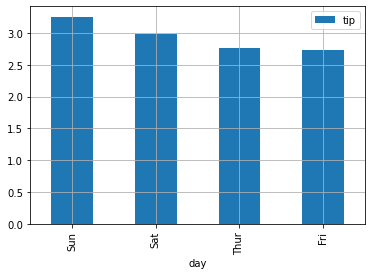

In [28]:
# 1. 요일별 팁의 평균을 구하세요
tipdf.groupby(['day'])[['tip']].mean()
tipdf.groupby(['day'])[['tip']].agg('mean')

# 2.
tip_group = tipdf.groupby('day')
tip_group[['tip']].mean()

# 3. 정령...내림차순
tip_group[['tip']].mean().sort_values(by='tip', ascending=False)

# 4. 시각화
tip_group[['tip']].mean().sort_values(by='tip', ascending=False).plot(kind='bar',grid=True)
plt.show()

In [29]:
# 이중으로 그룹핑 가능..성별, 나중에 다시 흡연여부로 그룹핑
tip_group2 = tipdf.groupby(['sex','smoker'])
tip_group2.mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

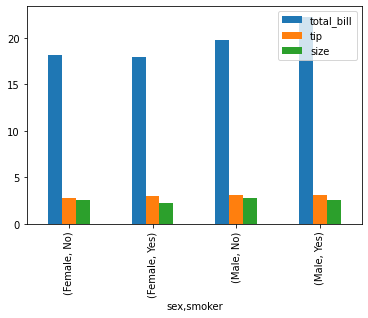

In [31]:
tip_group2.mean().plot(kind='bar')
plt.show()

### 다시 한번 짚어보기!!
    1. unique()
       중복된 것은 걸러버리고 중복되지 않은값만 데이타가 중복되어 있을때 
       unique해서 고유한 값만 찾아내고 다른 값들은 버려버릴때 많이 쓴다. 
       SQL에서 DISTINCT와 동일한 기능 LIST를 SET으로 변경한후 다시 LIST로 만드는 
       것과 동일
       
    2. describe()
        describe() 함수는 데이타에 대한 간력한 설명
        간략한 통계를 내준다.
        숫자로서 가능한 데이타만 나온다.
        하위 25%, 상위 25%
        4분위할 때 쓰는 부분이다.
        데이타 성격을 알고 싶을때 많이 사용한다.
        
    3. sum() 은 숫자 데이타에만 적용됨
    4. count()는 값의 갯수..
    
    5. value_counts()
       해당 컬럼에서 그 값이 몇번 나왔는지를 확인할때 사용한다.
       빈도수 확인할때 사용됨
       
    6.apply()
      판다스에서 내가 만들어서 적용시킬수 있는 함수기능
      판다스에서 제공해주지 않는 함수를 내가 만들어서
      적용할때 많이 사용한다.
      df['C'].apply(add)..인자값으로 함수이름

    7. 컬럼확인 | 인덱스 확인 | 컬럼명 수정
       디비에서 데이타를 가져오거나
       웹에서 데이타를 가져올때
       내가 원하는 이름을 컬럼명을 바꾸고 싶을때가 있다.
       컬럼명 수정은 빈번하게 진행된다.

In [33]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
df.describe()

,Gold,Silver
count,8.000000,8.00000
mean,4.000000,3.50000
std,2.976095,2.56348
min,1.000000,1.00000
25%,1.000000,1.75000
50%,4.000000,2.50000
75%,5.750000,5.25000
max,8.000000,8.00000


In [38]:
df.groupby('Gender').sum()
df.groupby('Smoking').count()

,Gender,Gold,Silver
Smoking,,,
Non-Smoker,4,4,4
Smoker,4,4,4


In [40]:
df['Smoking'].value_counts()

Non-Smoker    4
Smoker        4
Name: Smoking, dtype: int64

In [41]:
df[['Gold']]

,Gold
0,1
1,8
2,1
3,5
4,8
5,3
6,1
7,5


In [44]:
def add(df):
    return df+100-1

df[['Gold']].apply(add)
df[['Gold']].agg(add)

,Gold
0,100
1,107
2,100
3,104
4,107
5,102
6,100
7,104
